In [1]:
#importing imp libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataframe from kaggle
df = pd.read_csv("/content/Books_Data_Clean.csv")

In [4]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [12]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [14]:
#drop null terms from Book Name column
df.dropna(subset = "Book Name", inplace=True)

In [15]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [59]:
#checking if there is any duplicate element or not
df.duplicated().sum()

np.int64(0)

In [18]:
#checking no. of unique terms
df.nunique()

,0
index,1047
Publishing Year,149
Book Name,1045
Author,722
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,1041
genre,4
gross sales,813


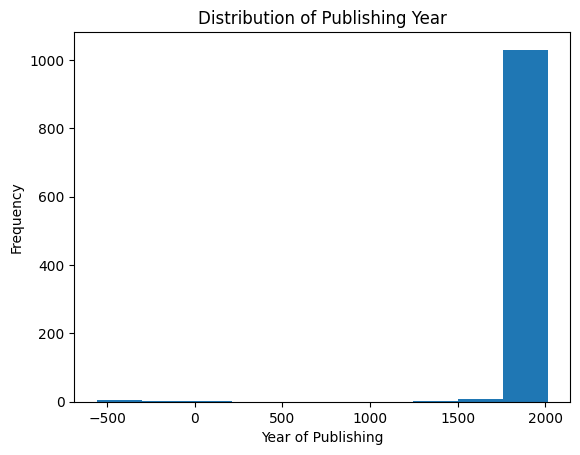

In [19]:
plt.hist(df["Publishing Year"])
plt.xlabel("Year of Publishing")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

In [21]:
#cleaning data with negative publishing year
df = df[df['Publishing Year']>1900]

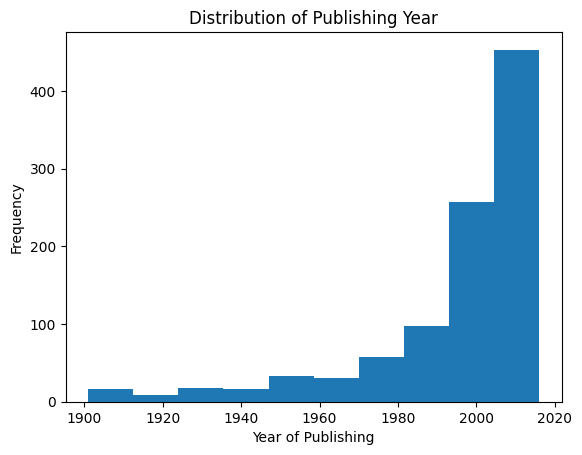

In [22]:
#corrected dataset by publishin year
plt.hist(df["Publishing Year"])
plt.xlabel("Year of Publishing")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

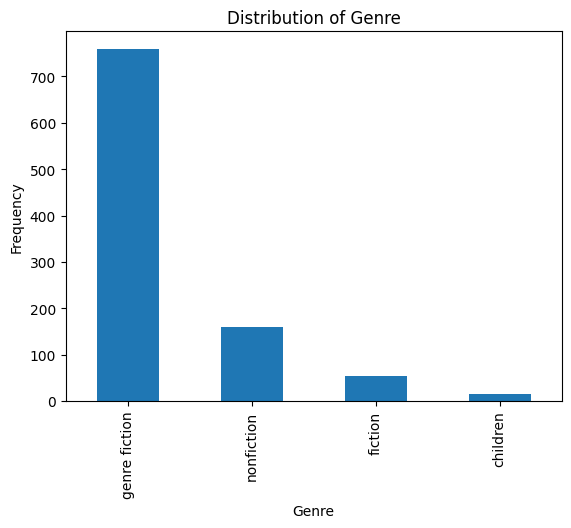

In [26]:
#Distribution od genere
df["genre"].value_counts().plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Distribution of Genre")
plt.show()

In [28]:
#Data grouped by author and book avg ratings
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


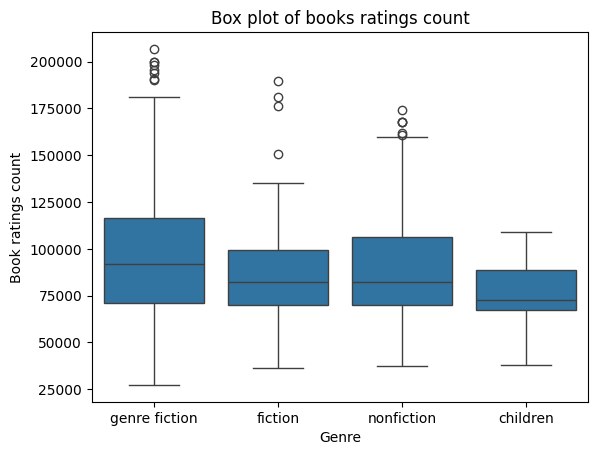

In [31]:
sns.boxplot(x="genre", y="Book_ratings_count", data=df)
plt.xlabel("Genre")
plt.ylabel("Book ratings count")
plt.title("Box plot of books ratings count")
plt.show()

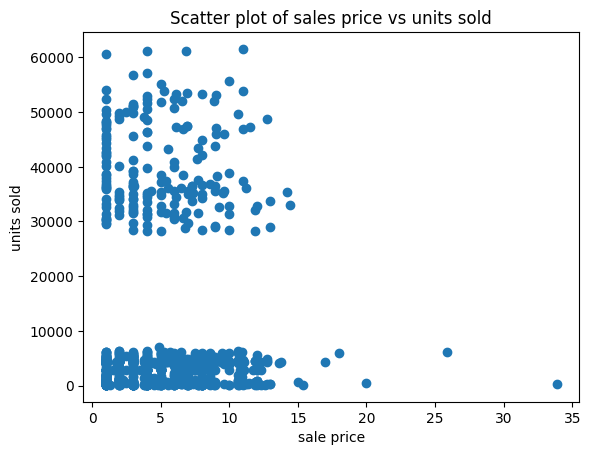

In [32]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("sale price")
plt.ylabel("units sold")
plt.title("Scatter plot of sales price vs units sold")
plt.show()

In [34]:
language_counts = df["language_code"].value_counts()

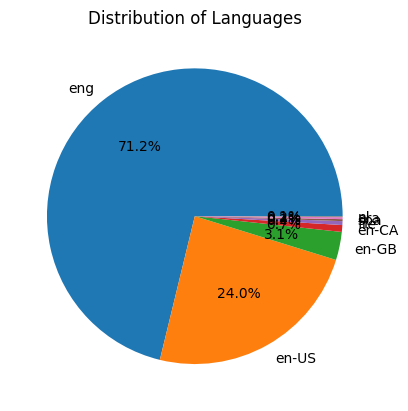

In [37]:
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Languages")
plt.show()

In [42]:
#Data grouped by publisher and publisher revenue
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [47]:
#Data grouped by author ratings and book ratings count
df.groupby("Author_Rating")["Book_ratings_count"].sum().sort_values(ascending=False)

,Book_ratings_count
Author_Rating,
Intermediate,58406557
Excellent,28158413
Famous,4718172
Novice,2444917


In [48]:
#Data grouped by language code and book average ratings
df.groupby("language_code")["Book_average_rating"].size().sort_values(ascending=False)

,Book_average_rating
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


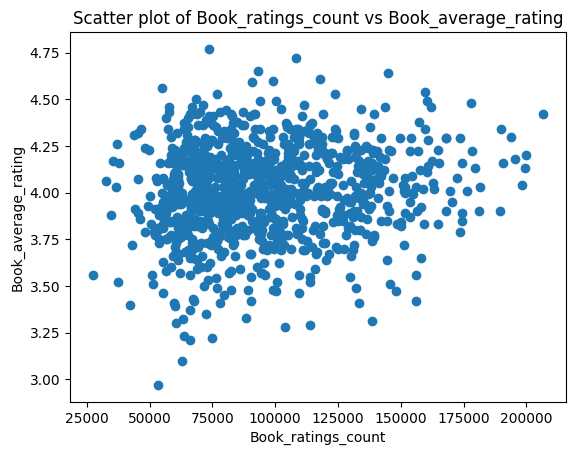

In [50]:
plt.scatter(df["Book_ratings_count"], df["Book_average_rating"])
plt.xlabel("Book_ratings_count")
plt.ylabel("Book_average_rating")
plt.title("Scatter plot of Book_ratings_count vs Book_average_rating")
plt.show()

In [51]:
#Data grouped by author and gross sales
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum().sort_values(ascending=False)

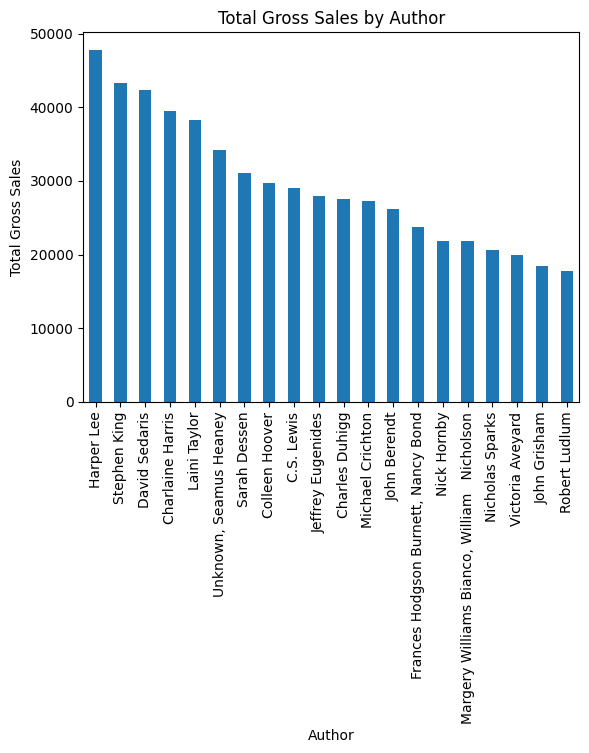

In [54]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales by Author")
plt.show()

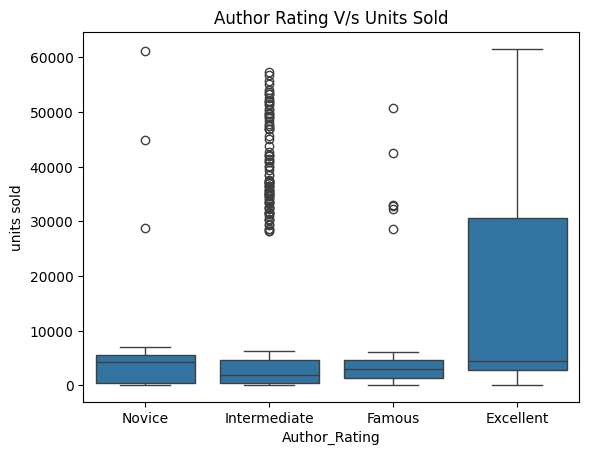

In [56]:
sns.boxplot(x="Author_Rating", y="units sold", data=df)
plt.xlabel("Author_Rating")
plt.ylabel("units sold")
plt.title("Author Rating V/s Units Sold")
plt.show()

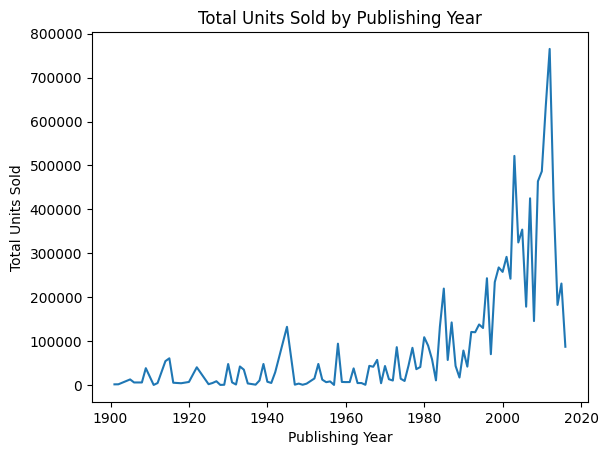

In [58]:
#Data grouped by publishing year and units sold
df.groupby("Publishing Year")["units sold"].sum().plot(kind='line')
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold by Publishing Year")
plt.show()